# Import Library

In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# Import Data Set and Early Exploration

In [48]:
df = pd.read_csv('recruitment_data.csv') # Load Data Set

In [49]:
df.head() #See Data 5 row of the data ser

,Serial_no,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location,Recruitment_Status
0,1,Male,Yes,0.0,Graduate,No,5139,0.0,1.0,Urban,Y
1,2,Male,No,1.0,Graduate,No,4583,128.0,1.0,Rural,N
2,3,Male,No,0.0,Graduate,Yes,3000,66.0,1.0,Urban,Y
3,4,Male,No,0.0,Not Graduate,No,2583,120.0,1.0,Urban,Y
4,5,Male,Yes,0.0,Graduate,No,6000,141.0,1.0,Urban,Y


In [50]:
df.info() #Data Set Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Serial_no           614 non-null    int64  
 1   Gender              601 non-null    object 
 2   Python_exp          611 non-null    object 
 3   Experience_Years    599 non-null    float64
 4   Education           614 non-null    object 
 5   Internship          582 non-null    object 
 6   Score               614 non-null    int64  
 7   Salary * 10E4       593 non-null    float64
 8   Offer_History       564 non-null    float64
 9   Location            614 non-null    object 
 10  Recruitment_Status  614 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 52.9+ KB


In [51]:
#Differentiate Categorical and Numerical Feature 
numerical = df.select_dtypes("number").columns.tolist() #Take numerical column name as a list
categorical = df.select_dtypes('object').columns.tolist() #Take categorical column name as a list
print(numerical)
print(categorical)

['Serial_no', 'Experience_Years', 'Score', 'Salary * 10E4', 'Offer_History']
['Gender', 'Python_exp', 'Education', 'Internship', 'Location', 'Recruitment_Status']


# Check for Missing Value and Duplicated Row

Text(0.5, 1.0, 'Missing Value')

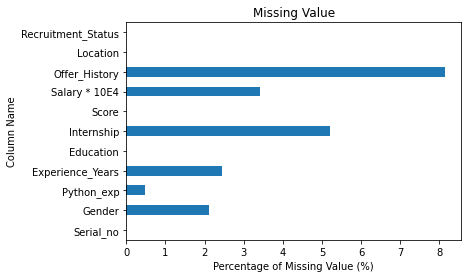

In [52]:
#check for Missing value for each column 
((df.isnull().sum()/len(df))*100).plot(kind='barh')
plt.xlabel('Percentage of Missing Value (%)')
plt.ylabel('Column Name')
plt.title('Missing Value')

In [53]:
#Check for duplicated rows 
df.duplicated().sum()

0

**Action:** Because the amount of data that is missing is quite few (Max. Null 8%), then we should drop the missing data

In [54]:
#Drop missing data 
df.dropna(axis=0, inplace=True)

In [55]:
#Recheck for Missing value 
df.isnull().sum()

Serial_no             0
Gender                0
Python_exp            0
Experience_Years      0
Education             0
Internship            0
Score                 0
Salary * 10E4         0
Offer_History         0
Location              0
Recruitment_Status    0
dtype: int64

In [56]:
#Data shape after removing missing values 
df.shape

(493, 11)

In [57]:
#Check for Serial_no unique value 
df['Serial_no'].nunique()

493

In [58]:
#Since Serial_no column is unique in every row, we could drop the column because it has no meaning 
df.drop('Serial_no', axis=1, inplace=True)

In [59]:
#Check for Used Column 
df.head()

,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location,Recruitment_Status
0,Male,Yes,0.0,Graduate,No,5139,0.0,1.0,Urban,Y
1,Male,No,1.0,Graduate,No,4583,128.0,1.0,Rural,N
2,Male,No,0.0,Graduate,Yes,3000,66.0,1.0,Urban,Y
3,Male,No,0.0,Not Graduate,No,2583,120.0,1.0,Urban,Y
4,Male,Yes,0.0,Graduate,No,6000,141.0,1.0,Urban,Y


# Simple Exploratory Data Analysis

## Univariate Analysis

### Categorical Column 

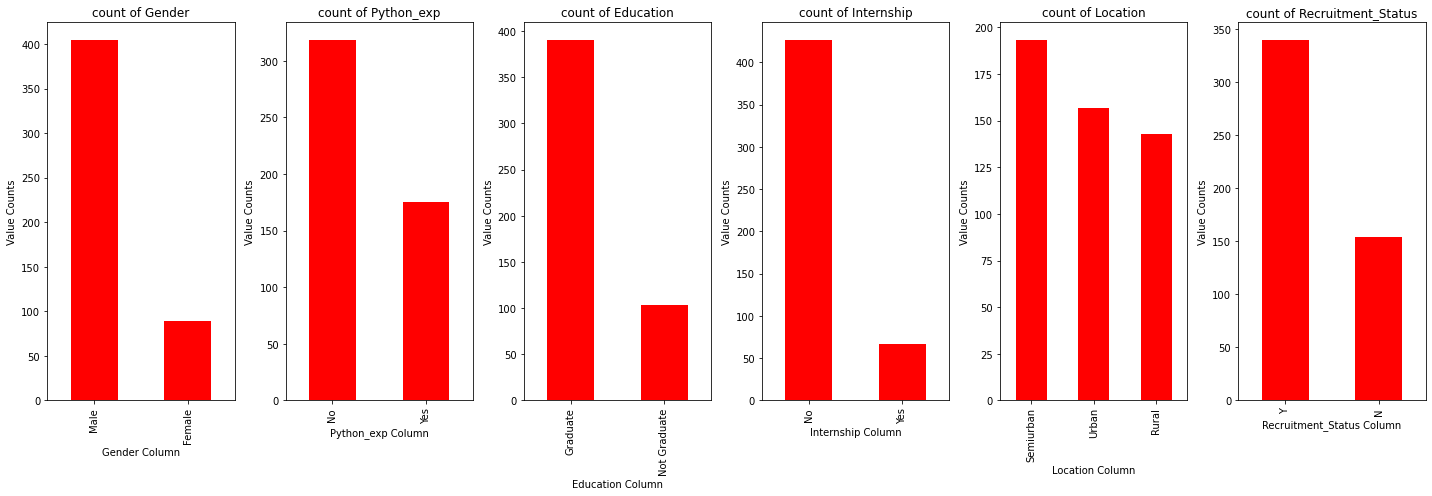

In [60]:
#Value Counts of Categorical Column
fig = plt.figure(figsize=(20,7))
ax_value = []
for x in range(len(categorical)): 
    ax_value.append(f'ax{x}')
                    
for i in range(len(categorical)):
    ax_value[i] = fig.add_subplot(1, len(categorical), i + 1)
    df[categorical[i]].value_counts().plot(kind='bar', color='red', ax=ax_value[i])
    ax_value[i].set_title(f'count of {categorical[i]}')
    ax_value[i].set_xlabel(f'{categorical[i]} Column')
    ax_value[i].set_ylabel('Value Counts')
    plt.tight_layout()
        

**Conclusion :** Most of the candidate didn't have any prior experience for python as well as internship. The job was dominated by male and most of the candidate has a Degree (Graduate). 

Based on the target (Recruitment_Status), we can identify that the data set is imbalanced data set. Thus, Imbalanced Data Handling is necessary to be done before training the data set.

In [61]:
#Statistical Summary of Categorical Columns
df[categorical].describe()

,Gender,Python_exp,Education,Internship,Location,Recruitment_Status
count,493,493,493,493,493,493
unique,2,2,2,2,3,2
top,Male,No,Graduate,No,Semiurban,Y
freq,404,318,390,426,193,339


### Numerical Column

In [62]:
#Since we have already drop Serial_no column,  we have to create a new list consisting the remaining numerical column 
numerical_new = df.select_dtypes('number').columns.tolist()
numerical_new

['Experience_Years', 'Score', 'Salary * 10E4', 'Offer_History']

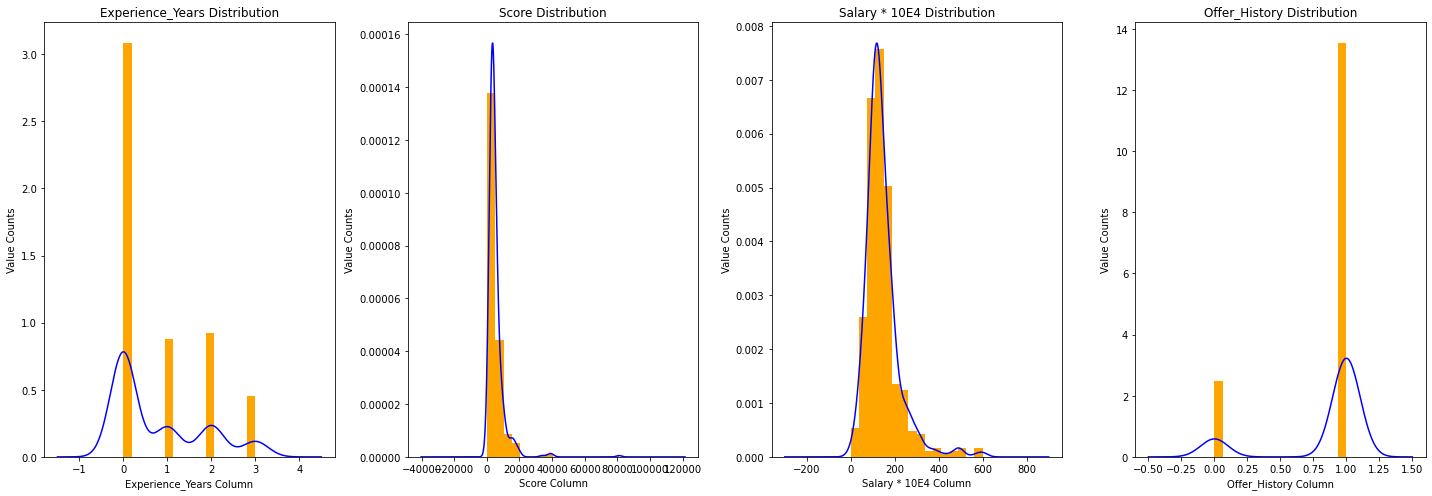

In [63]:
#Distribution Plot for Numerical Column 
fig = plt.figure(figsize=(20,7))
ax_value = []
for x in range(len(numerical_new)): 
    ax_value.append(f'ax{x}')
                    
for i in range(len(numerical_new)):
    ax_value[i] = fig.add_subplot(1, len(numerical_new), i + 1)
    df[numerical_new[i]].plot(kind='kde', color='Blue', ax=ax_value[i])
    df[numerical_new[i]].plot(kind='hist', density=True, bins=16, color='orange', ax=ax_value[i])
    ax_value[i].set_title(f'{numerical_new[i]} Distribution')
    ax_value[i].set_xlabel(f'{numerical_new[i]} Column')
    ax_value[i].set_ylabel('Value Counts')
    plt.tight_layout()
        

**Conclusion:** Experience Years and Offer History column are discrete numerical variable. While Score and Salary (continous variable) seems to be skewed distributed data. Thus, we will expect there are outliers in Score and Salary Column.

In [64]:
#Statistical Summary of Numerical Feature 
df[numerical_new].describe()

,Experience_Years,Score,Salary * 10E4,Offer_History
count,493.000000,493.000000,493.000000,493.000000
mean,0.764706,5334.087221,143.843813,0.845842
std,1.018833,5602.830386,79.947938,0.361467
min,0.000000,150.000000,0.000000,0.000000
25%,0.000000,2900.000000,100.000000,1.000000
50%,0.000000,3859.000000,128.000000,1.000000
75%,2.000000,5821.000000,170.000000,1.000000
max,3.000000,81000.000000,600.000000,1.000000


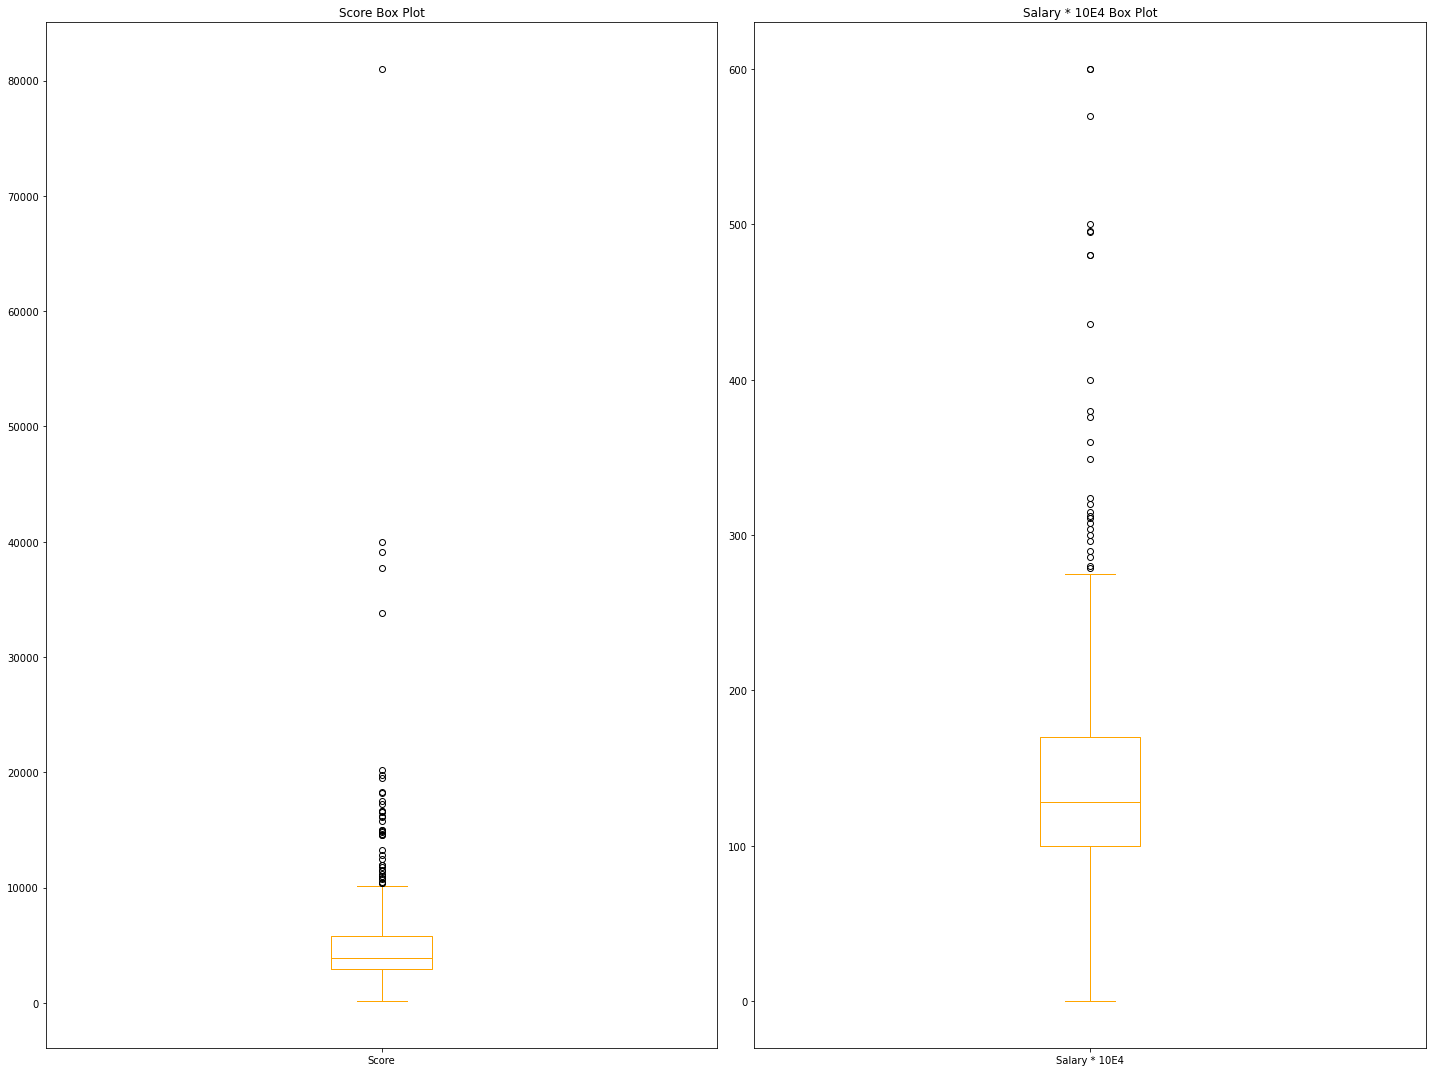

In [65]:
#Boxplot for Continuous Numerical Column
fig = plt.figure(figsize=(20,15))
continous_numerical = ['Score', 'Salary * 10E4']
ax_value = []
for x in range(len(continous_numerical)): 
    ax_value.append(f'ax{x}')
                    
for i in range(len(continous_numerical)):
    ax_value[i] = fig.add_subplot(1, len(continous_numerical), i + 1)
    df[continous_numerical[i]].plot(kind='box', color='orange', ax=ax_value[i])
    ax_value[i].set_title(f'{continous_numerical[i]} Box Plot')
    plt.tight_layout()

**Possible Action** : Since Score is achieved from candidate test and interview score, it is make sense that there are some candidates that are brilliant. For the salary, it is also make sense for candidates who have a bigger previous salary because of the his/her experience. So, this two outliers will be kept for the modelling.

## Correlation Matrix

<AxesSubplot:>

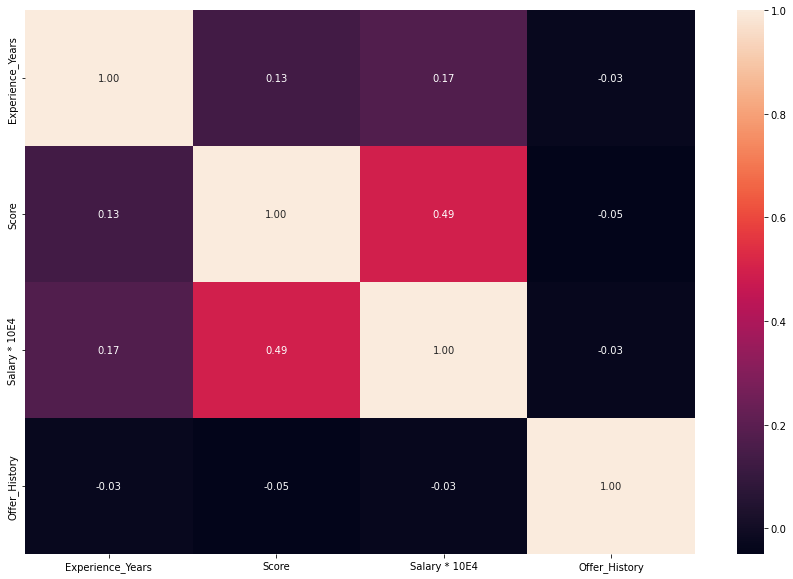

In [66]:
#Plot the Correlation Matrix for Numerical Column
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

**Conclusion** : There is no column which has a correlation value greater than 0.8. Thus, we can carry on with all the features.

# Pre Processing Categorical Variable (Categorical ---> Numerical)

## Python_exp and Internship Column

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    object 
 1   Python_exp          493 non-null    object 
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    object 
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 42.4+ KB


In [68]:
df['Internship'].unique()

array(['No', 'Yes'], dtype=object)

In [69]:
df['Python_exp'].unique()

array(['Yes', 'No'], dtype=object)

In [70]:
#Endocing Python_exp and internship column 
y_n_enc = {'Yes' : 1, 
          'No' : 0}
df['Internship'] = df['Internship'].map(y_n_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    object 
 1   Python_exp          493 non-null    object 
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 42.4+ KB


In [71]:
df['Python_exp'] = df['Python_exp'].map(y_n_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    object 
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 42.4+ KB


## Recruitment_Status Column

In [72]:
#Recruitment_Status Unique Value 
df['Recruitment_Status'].unique()

array(['Y', 'N'], dtype=object)

In [73]:
#Binary Encoding for Recruitment_Status Column 
rec_enc = {'Y' : 1, 
          'N' : 0}
df['Recruitment_Status'] = df['Recruitment_Status'].map(rec_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    object 
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 42.4+ KB


## Gender Column

In [74]:
#Gender Column Unique Value 
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [75]:
#Binary Encoding for Gender Column 
gen_enc = {'Male' : 1, 
          'Female' : 0}
df['Gender'] = df['Gender'].map(gen_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    int64  
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 42.4+ KB


## Education Column

In [76]:
#Education Column Unique Valie 
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [77]:
#Binary Encoding for Education Column 
ed_enc = {'Graduate' : 1, 
          'Not Graduate' : 0}
df['Education'] = df['Education'].map(ed_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    int64  
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    int64  
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 42.4+ KB


## Location Column 

In [78]:
#Location Unique Value 
df['Location'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

**Possible Action:** Because candidates who live in Urban Place has a higher tendency to become a top candidate (Urban Education is better than rural and also its has better competitiveness). Thus, we should perform ordinal encoding for this column.   

Rank for Ordinal Encoding: 

Urban (Highest) -> Semiurban -> Rural

In [79]:
#Ordinal Encoding for Location Column 
loc_enc = {'Urban':3, 
          'Semiurban' : 2, 
          'Rural' : 1}
df['Location'] = df['Location'].map(loc_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    int64  
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    int64  
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    int64  
 9   Recruitment_Status  493 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 42.4 KB


In [80]:
#Download Preprocessed Data Set
from IPython.display import FileLink
# Import a module to delete the file
import os
# Create a download function
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv within a Jupyter notebook

    Parameters
    ----------
    df : pandas data frame
    csv_file_name : str
    delete_prompt : bool
    """
    df.to_csv(csv_file_name, index=False)
    display(FileLink(csv_file_name))
    if delete_prompt:
        a = input('Press enter to delete the file after you have downloaded it.')
        os.remove(csv_file_name)


# Use the function to diplay a download link
csv_download_link(df, 'cleaned Recruitment.csv')

C:\Users\HARIS\week2\cleaned Recruitment.csv

Press enter to delete the file after you have downloaded it.


# Modelling and Best Model Selection

In [81]:
#Split Target and Feature 
df = df.replace(r'^\s*$', np.nan, regex=True) #for convert into float
X = df.drop('Recruitment_Status', axis=1) #Feature
Y = df['Recruitment_Status'] #Target

In [82]:
#Perform SMOTE Imbalanced Data Handling 
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, Y)

In [83]:
X_res.shape, y_res.shape

((678, 9), (678,))

In [84]:
#Split Train Test Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42) #Split by 80% and 20%

In [85]:
X_train.shape, y_train.shape

((542, 9), (542,))

In [86]:
#Multiple Modelling and Evaluate using AUC Score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

model_alg = [RandomForestClassifier(), 
             DecisionTreeClassifier(),
             KNeighborsClassifier(), 
             LogisticRegression() 
             ]
df_mod_eval = pd.DataFrame(columns = ['Algorithm','AUC Score']) 

for model in model_alg : 
  model.fit(X_train, y_train)
  algorithm = str(type(model)).split('.')[-1][:-2]
  y_pred_proba = model.predict_proba(X_test)[::,1]
  auc = roc_auc_score(y_test, y_pred_proba)
  df_mod_eval = df_mod_eval.append({'Algorithm' : algorithm, 
                                    'AUC Score' : auc},ignore_index=True)
df_mod_eval

C:\Users\HARIS\AppData\Local\Temp\ipykernel_11500\784999691.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mod_eval = df_mod_eval.append({'Algorithm' : algorithm,
C:\Users\HARIS\AppData\Local\Temp\ipykernel_11500\784999691.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mod_eval = df_mod_eval.append({'Algorithm' : algorithm,
C:\Users\HARIS\AppData\Local\Temp\ipykernel_11500\784999691.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mod_eval = df_mod_eval.append({'Algorithm' : algorithm,
C:\Users\HARIS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteration

,Algorithm,AUC Score
0,RandomForestClassifier,0.900974
1,DecisionTreeClassifier,0.801082
2,KNeighborsClassifier,0.669697
3,LogisticRegression,0.798052


**Conclusion :** Random Forrest Classifier Gives the Best Model for the Classification

# Model Evaluation

In [87]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
#Classification Report 
from sklearn.metrics import classification_report
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        70
           1       0.79      0.92      0.85        66

    accuracy                           0.85       136
   macro avg       0.85      0.85      0.85       136
weighted avg       0.86      0.85      0.84       136



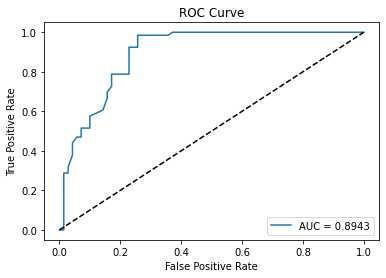

In [89]:
#ROC Curve 
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

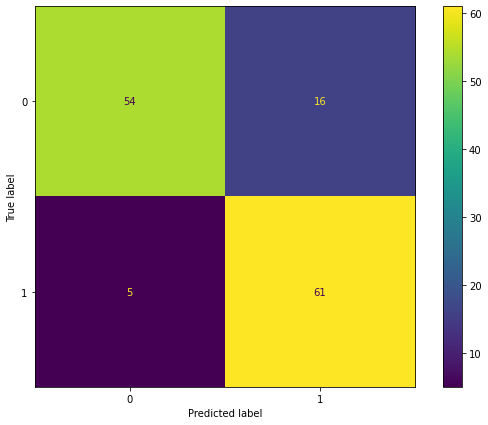

In [90]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
target_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, target_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rfc.classes_)
disp.plot(ax=ax)
plt.show()

**Conclusion :** The Model has Sufficient Accuracy (88%)

Text(0, 0.5, 'Feature')

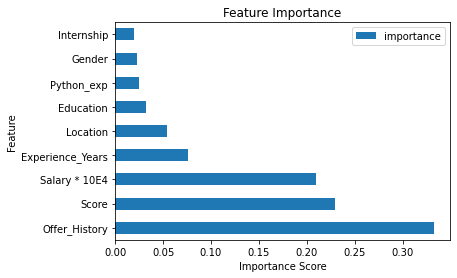

In [91]:
# Feature Importance 
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.set_index('feature', inplace=True)
df_all_features.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

In [92]:
#save model
import pickle
filename='savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))
load_model=pickle.load(open(filename, 'rb'))